<a href="https://colab.research.google.com/github/WillianReinaG/ETLInfrati/blob/main/Copia_de_SVM_Ejercicios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machines

Las máquinas de vectores de soporte (SVM) se encuentran aún entre los mejores algoritmos de aprendizaje supervisado disponibles comercialmente. Para explicar la historia de las SVM, primero debemos hablar de los márgenes y la idea de separar los datos con una gran "brecha". A continuación, abordaremos el clasificador de margen óptimo, lo que nos llevará a una digresión sobre la dualidad de Lagrange, un concepto clásico de optimización. También veremos los kernels, que permiten aplicar las SVM de manera eficiente en espacios de características de muy alta dimensión (como los de dimensión infinita).

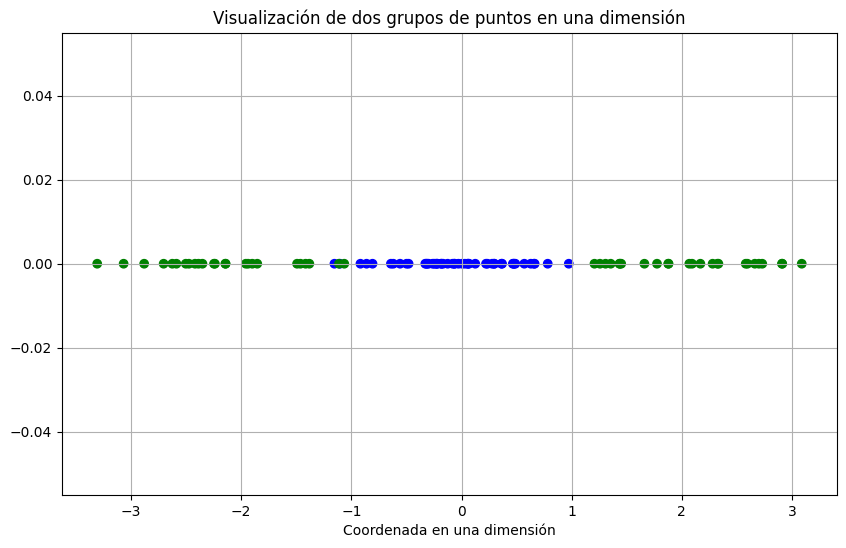

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generar puntos para el grupo 1 en la parte central
group1 = np.random.normal(loc=0, scale=0.5, size=50)
# Generar puntos para el grupo 2 a los lados del grupo 1
group2 =np.hstack( (np.random.normal(loc=-2, scale=0.5, size=25), np.random.normal(loc=2, scale=0.5, size=25)))
# Concatenar los puntos de los dos grupos
points = np.concatenate([group1, group2])
# Etiquetas para los puntos
labels = np.concatenate([np.zeros(50), np.ones(50)])
# Colores para los puntos según sus etiquetas
colors = {0: 'blue', 1: 'green'}
# Visualización de los puntos en una sola dimensión
plt.figure(figsize=(10, 6))
plt.scatter(points, np.zeros_like(points), c=[colors[label] for label in labels], marker='o')
plt.title('Visualización de dos grupos de puntos en una dimensión')
plt.xlabel('Coordenada en una dimensión')

plt.grid(True)



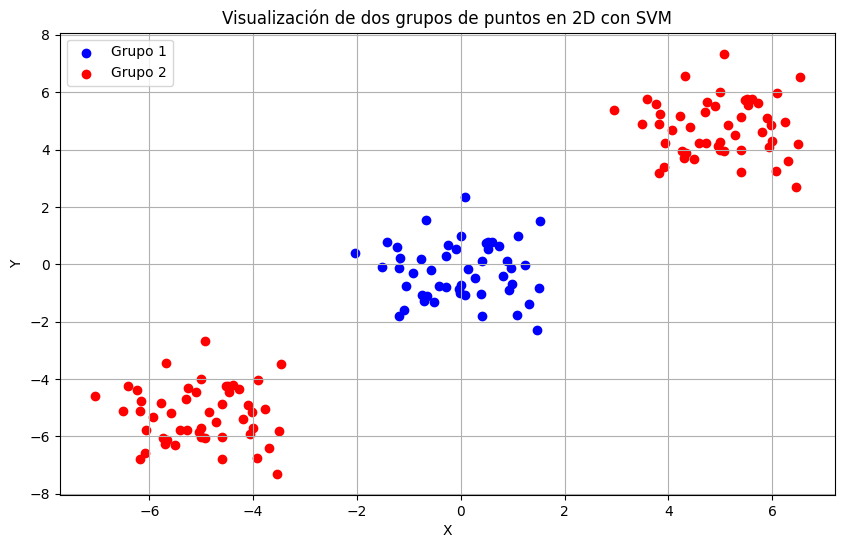

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

# Generar puntos del grupo 1 en el centro
center_points = np.random.randn(50, 2)

# Generar puntos del grupo 2 a los lados
side_points1 = center_points + np.array([5, 5])
side_points2 = center_points + np.array([-5, -5])

# Combinar los puntos de ambos grupos
X = np.vstack([center_points, side_points1, side_points2])
y = np.hstack([np.zeros(50), np.ones(50), np.ones(50) * 2])
# Visualizar los puntos y el hiperplano de separación
plt.figure(figsize=(10, 6))

# Plot de los puntos del grupo 1
plt.scatter(center_points[:, 0], center_points[:, 1], color='blue', label='Grupo 1')

# Plot de los puntos del grupo 2
plt.scatter(side_points1[:, 0], side_points1[:, 1], color='red', label='Grupo 2')
plt.scatter(side_points2[:, 0], side_points2[:, 1], color='red')


plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Visualización de dos grupos de puntos en 2D con SVM')
plt.grid(True)
plt.show()


### Experimento 1: kernel lineal

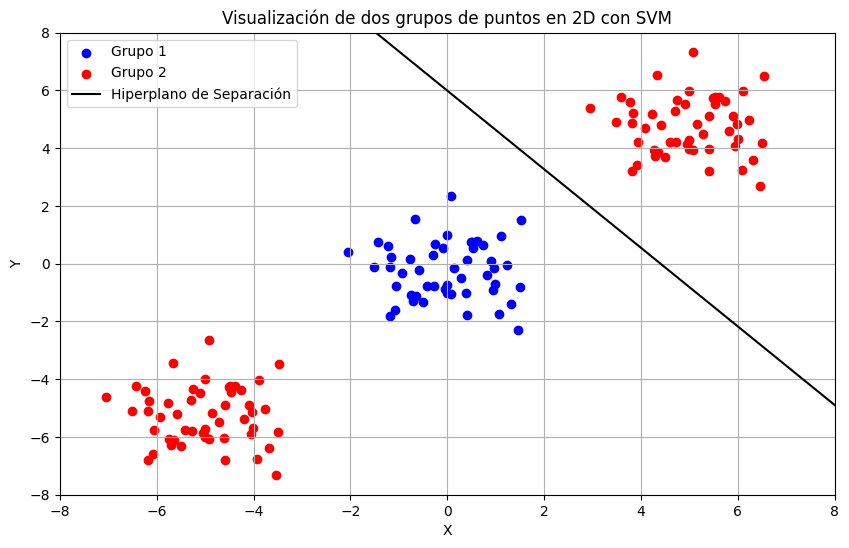

In [ ]:
# Visualizar los puntos y el hiperplano de separación
plt.figure(figsize=(10, 6))

# Plot de los puntos del grupo 1
plt.scatter(center_points[:, 0], center_points[:, 1], color='blue', label='Grupo 1')

# Plot de los puntos del grupo 2
plt.scatter(side_points1[:, 0], side_points1[:, 1], color='red', label='Grupo 2')
plt.scatter(side_points2[:, 0], side_points2[:, 1], color='red')


# Entrenar un clasificador SVM
clf = SVC(kernel='linear')
clf.fit(X, y)

# Obtener el hiperplano de separación
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-10, 10)
yy = a * xx - (clf.intercept_[0]) / w[1]

# Plot del hiperplano de separación
plt.plot(xx, yy, 'k-', label='Hiperplano de Separación')

plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Visualización de dos grupos de puntos en 2D con SVM')
plt.grid(True)
plt.axis([-8,8,-8,8])
plt.show()

### Ejercicio 1
Implementemos el  kernel Gaussiano

Considere dos datos, $(x^i,y^i)$ y $(x^j,y^j)$, donde cada vector de entrada $x$ tiene $n$ características (atributos). El kernel Gaussiano se define como:


$K(x^i,x^j)= exp(-\frac{|x^i-x^j|^2}{2\sigma^ 2}) = exp(-\frac{\sum_{k=1} ^ n (x^i _k-x^j _k)^2}{2\sigma^2})$


El parametro $\sigma$ controla la velocidad de decaimiento  a la que los  vectores $x^i$ y $x^j$ se apartan.

### Su tarea
Implemente una función para calcular el kernel gaussiano, debe recibir dos vectores de características y un parámetro $\sigma$


Una vez que haya completado la función gaussianKernel, la siguiente celda probará su función kernel en dos ejemplos proporcionados y debería esperar ver un valor de:

    1. 0.6669768108584743   if the input is one dimensional
    2. 0.5352614285189903  if the input is two dimensional

In [ ]:
import numpy as np

In [ ]:
def gaussianKernel(x1,x2,sigma):
    K=0
    #your code here

    #
    return K

In [ ]:
x1 = 1.0,1
x2 = 2.1
sigma = 1.2;
K = gaussianKernel(x1, x2, sigma)
print('one dimension:', K)
x1 = np.array([1, 2])
x2 = np.array([1.5, 2.1])
sigma = 1
K = gaussianKernel(x1, x2, sigma)
print('two dimension:', K)

one dimension: 0
two dimension: 0


In [ ]:
import numpy as np

def gaussian_kernel(xi, xj, sigma):
    """
    Calcula el kernel Gaussiano entre dos vectores de características.

    Args:
    xi: numpy array o escalar, primer vector de características.
    xj: numpy array o escalar, segundo vector de características.
    sigma: float, parámetro que controla la velocidad de decaimiento.

    Returns:
    float, el valor del kernel Gaussiano.
    """
    xi = np.array(xi, dtype=float)
    xj = np.array(xj, dtype=float)

    squared_norm = np.sum((xi - xj) ** 2)  # Norma al cuadrado
    return np.exp(-squared_norm / (2 * sigma ** 2))  # Aplicación de la función exponencial

# Prueba con los ejemplos proporcionados
xi = 9.5
xj = 2.0
sigma = 0.566557721
K1 = gaussian_kernel(x1, x2, sigma)
print('one dimension:', K1)  # Esperado: 0.6669768108584743

x1 = np.array([1, 2])
x2 = np.array([1.5, 2.1])
sigma = 0.456072
K2 = gaussian_kernel(x1, x2, sigma)
print('two dimension:', K2)  # Esperado: 0.5352614285189903

one dimension: 0.6669768082528201
two dimension: 0.5352641131490474


Explora cómo afecta el valor de $\sigma$ cuando hay puntos cercanos o alejados.

### Ejercicio 2
Comenzaremos con un conjunto de datos de ejemplo en 2D que pueden separarse mediante un límite lineal. El script representará gráficamente los datos de entrenamiento. En este conjunto de datos, las posiciones de los ejemplos positivos (indicados con +) y los negativos (indicados con o) sugieren una separación natural, indicada por la brecha. Sin embargo, observe que hay un valor atípico positivo + en el extremo izquierdo, aproximadamente en (0.1, 4.1). Como parte de este ejercicio, también verá cómo este valor atípico afecta el límite de decisión de SVM.

In [ ]:
import matplotlib.pyplot as plt
from sklearn import svm
%matplotlib inline
########################################################################################
def plot_hyperplane(clf, min_x, max_x, linestyle, label):
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(min_x - 2, max_x + 2)  # make sure the line is long enough
    yy = a * xx - (clf.intercept_[0]) / w[1]
    plt.plot(xx, yy, linestyle, label=label)


En esta parte del ejercicio, intentará usar diferentes valores del parámetro $C$ con las máquinas de modelado de valores (SVM). Informalmente, el parámetro $C$ es un valor positivo que controla la penalización por ejemplos de entrenamiento mal clasificados. Un parámetro $C$ alto indica a la SVM que intente clasificar todos los ejemplos correctamente.

La siguiente parte consiste en ejecutar el entrenamiento de la SVM (con $C = 1$) utilizando el modelo SVM que he incluido en el código de inicio. Cuando $C = 1$, debería observar que la SVM coloca el límite de decisión en el espacio entre los dos conjuntos de datos y clasifica erróneamente el punto de datos del extremo izquierdo.

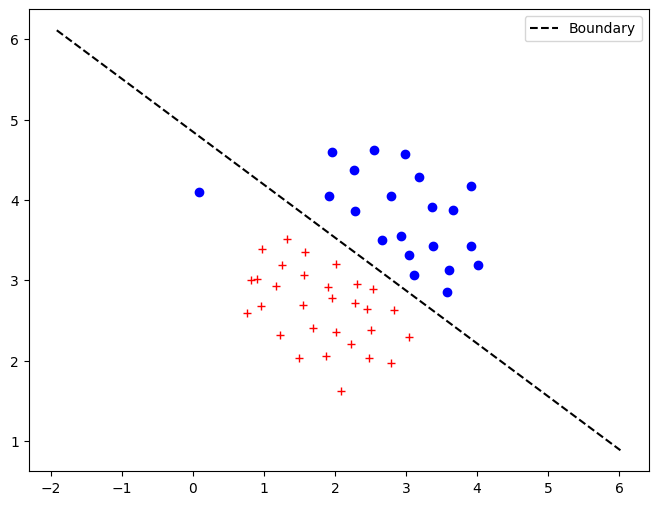

In [ ]:
########################################################################################
#cargar dataset1
data=np.loadtxt('dataset1.data',delimiter=',')
X=data[:,:2]
Y=data[:,2].astype(int)
########################
##graficar datos
plt.figure(figsize=(8, 6))

plt.plot(X[Y==0,0],X[Y==0,1],'+r')
plt.plot(X[Y==1,0],X[Y==1,1],'ob')
#create classifiers
C = 1  # parametro de regularizacion de la svm
clf_lin  = svm.SVC(kernel='linear',C=C)

#entrenar
clf_lin.fit(X, Y)
#graficar frontera
min_x=X[:,0].min()
max_x=X[:,0].max()

plot_hyperplane(clf_lin, min_x, max_x, 'k--', label= 'Boundary')
plt.legend();


### Su tarea

Su tarea consiste en probar diferentes valores de $C$ en este conjunto de datos. En particular, debe cambiar el valor de $C$ en el script e incluir $C = 100$ y volver a ejecutar el entrenamiento de SVM. Cuando $C = 100$, debería comprobar que SVM clasifica correctamente cada ejemplo, pero tiene un límite de decisión que no parece ajustarse naturalmente a los datos.

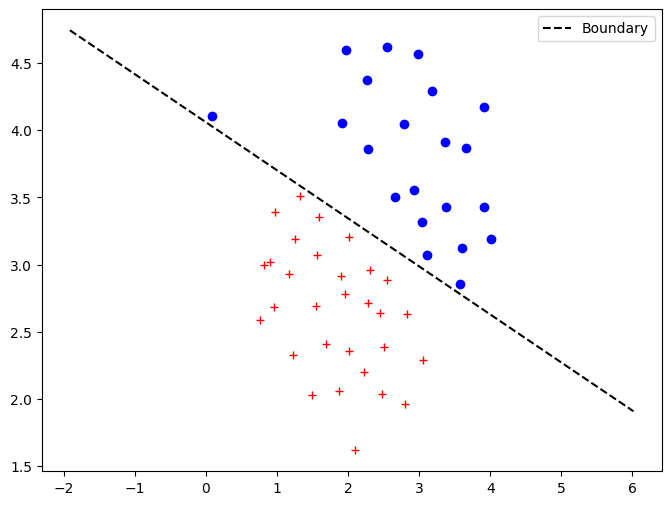

In [ ]:
########################################################################################
#cargar dataset1
data=np.loadtxt('dataset1.data',delimiter=',')
X=data[:,:2]
Y=data[:,2].astype(int)
########################
##graficar datos
plt.figure(figsize=(8, 6))

plt.plot(X[Y==0,0],X[Y==0,1],'+r')
plt.plot(X[Y==1,0],X[Y==1,1],'ob')
#create classifiers
C = 100  # parametro de regularizacion de la svm
clf_lin  = svm.SVC(kernel='linear',C=C)

#entrenar
clf_lin.fit(X, Y)
#graficar frontera
min_x=X[:,0].min()
max_x=X[:,0].max()

plot_hyperplane(clf_lin, min_x, max_x, 'k--', label= 'Boundary')
plt.legend();

### Ejercicio 3

En la siguiente parte, se cargará y graficará el conjunto de datos 2. En el gráfico, se puede observar que no existe un límite de decisión lineal que separe los ejemplos positivos y negativos de este conjunto de datos. Sin embargo, al usar el kernel gaussiano con la SVM, se podrá determinar un límite de decisión no lineal con un rendimiento razonablemente bueno para el conjunto de datos.

### Su tarea

Debe cambiar el parámetro $\gamma$, ya que está asociado con el parámetro $\sigma$ de la primera ecuación. No debe usar valores superiores a 50.

Explique cuál es el efecto de cambiar el parámetro gamma.

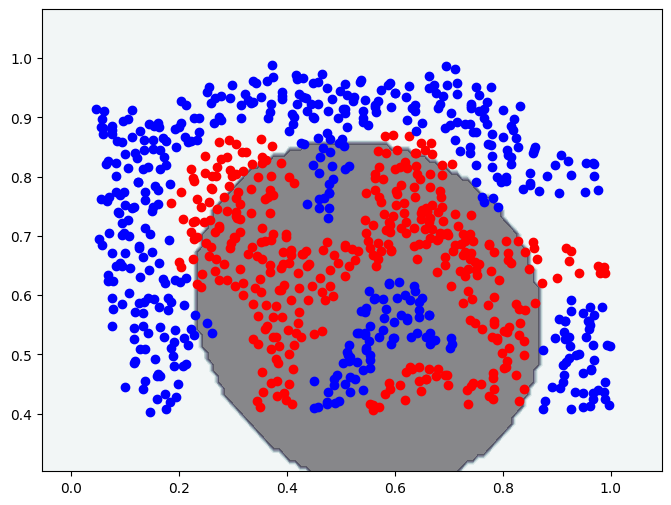

In [ ]:
########################################################################################
def plot_hyperplane(clf, X):
    # create a mesh to plot in
    h=0.01
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    CS=plt.contourf(xx, yy, Z,cmap=plt.cm.bone,alpha=0.5)
    #CS.cmap.set_under('yellow')
    #CS.cmap.set_over('cyan')

########################################################################################
#cargar dataset2
data=np.loadtxt('dataset2.data',delimiter=',')
X=data[:,:2]
Y=data[:,2].astype(int)
########################
##graficar datos
plt.figure(figsize=(8, 6))

plt.plot(X[Y==0,0],X[Y==0,1],'or')
plt.plot(X[Y==1,0],X[Y==1,1],'ob')
########################################################################
#create classifiers
C    = 1  # parametro de regularizacion de la svm
gamma= 1 #parametro gamma de la funcion de base radial
clf_rbf     = svm.SVC(kernel='rbf', gamma=gamma, C=C)
#entrenar
clf_rbf.fit(X, Y)

#graficar frontera
plot_hyperplane(clf_rbf,X)



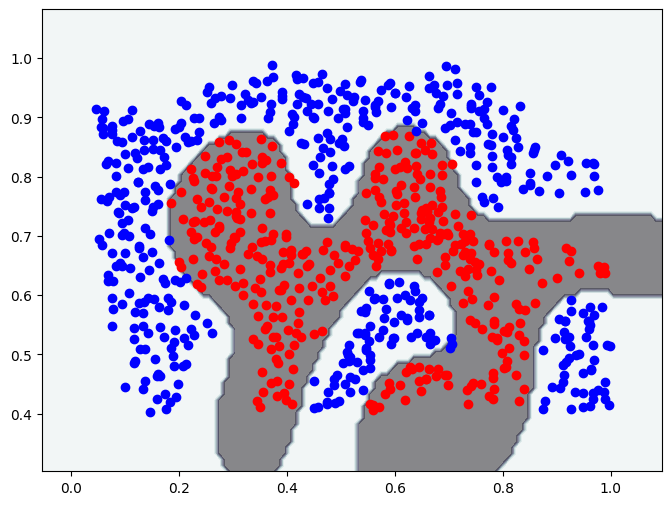

In [ ]:
########################################################################################
def plot_hyperplane(clf, X):
    # create a mesh to plot in
    h=0.01
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    CS=plt.contourf(xx, yy, Z,cmap=plt.cm.bone,alpha=0.5)
    #CS.cmap.set_under('yellow')
    #CS.cmap.set_over('cyan')

########################################################################################
#cargar dataset2
data=np.loadtxt('dataset2.data',delimiter=',')
X=data[:,:2]
Y=data[:,2].astype(int)
########################
##graficar datos
plt.figure(figsize=(8, 6))

plt.plot(X[Y==0,0],X[Y==0,1],'or')
plt.plot(X[Y==1,0],X[Y==1,1],'ob')
########################################################################
#create classifiers
C    = 1  # parametro de regularizacion de la svm
gamma= 65 #parametro gamma de la funcion de base radial
clf_rbf     = svm.SVC(kernel='rbf', gamma=gamma, C=C)
#entrenar
clf_rbf.fit(X, Y)

#graficar frontera
plot_hyperplane(clf_rbf,X)

concluciones el modelo aprende la separación entre las clases,  aprende patrones demasiado específicos del conjunto de entrenamiento generando sobre ajuste.

### Ejercicio 4

En esta parte del ejercicio, adquirirá habilidades prácticas para usar una máquina de vectores de soporte (SVM) con un kernel gaussiano. En la siguiente parte, cargará y mostrará un tercer conjunto de datos. Con este conjunto de datos, utilizará la SVM con el kernel gaussiano.

En el conjunto de datos proporcionado, data3, se proporcionan las variables X, y, X_test, y_test. El código proporcionado entrena el clasificador SVM utilizando el conjunto de entrenamiento (X, y) con algunos parámetros iniciales. Su tarea consiste en utilizar el conjunto de validación cruzada X_test, y_test para determinar los mejores parámetros $C$ y $\gamma$. Debe escribir cualquier código adicional necesario para facilitar la búsqueda sobre los parámetros $C$ y $\gamma$. Se sugiere probar valores en pasos multiplicativos (p. ej., 0,01; 0,03; 0,1; 0,3; 1; 3; 10; 30).

Tenga en cuenta que debe probar todos los pares de valores posibles para $C$ y $\gamma$. Por ejemplo, si prueba cada uno de los 8 valores mencionados anteriormente para $C$ y $\gamma$, terminará entrenando y evaluando (en el conjunto de validación cruzada) un total de 8 x 8 = 64 modelos diferentes.

50.23696682464455


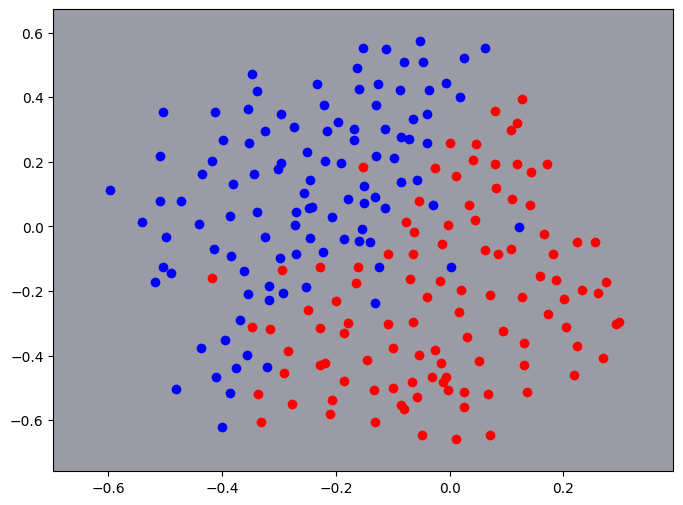

In [ ]:
########################################################################################
def plot_hyperplane(clf, X):
    # create a mesh to plot in
    h=0.01
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    CS=plt.contourf(xx, yy, Z,cmap=plt.cm.bone,alpha=0.5)
    #CS.cmap.set_under('yellow')
    #CS.cmap.set_over('cyan')


########################################################################################
#cargar dataset3: conjunto de entrenamiento y conjunto de prueba
data=np.loadtxt('dataset3_train.data',delimiter=',')
X=data[:,:2]
y=data[:,2].astype(int)
#data=np.loadtxt('dataset3_test.data',delimiter=',')
X_test=data[:,:2]
y_test=data[:,2].astype(int)

########################

##graficar datos de entrenamiento
plt.figure(figsize=(8, 6))

plt.plot(X[y==0,0],X[y==0,1],'or')
plt.plot(X[y==1,0],X[y==1,1],'ob')

########################################################################
C=np.array([0.01, 0.03, 0.1,0.3, 1,3,10,30])
gamma=np.array([0.01, 0.03, 0.1,0.3, 1,3,10,30])
## su codigo va aqui #########



#por ejemplo para un par de valores, C = 0.01 y gamma = 0.001 se tiene que el clasificador no funciona bien, accuracy es incluso por debajo
#de 50%
clf_rbf     = svm.SVC(kernel='rbf', gamma=gamma[0], C=C[0])
#entrenar
clf_rbf.fit(X, y)
y_pred = clf_rbf.predict(X_test)
por  = (y_test==y_pred).sum()/y_test.size*100
print(por)



#graficar frontera para el mejor par (C,gamma)
plot_hyperplane(clf_rbf,X)


plt.show()



## Escriba algunas conclusiones u observaciones finales.

Best parameters: {'C': 30, 'gamma': 3}
Best cross-validation score: 0.9194905869324475
Accuracy on test set with best parameters: 94.31%


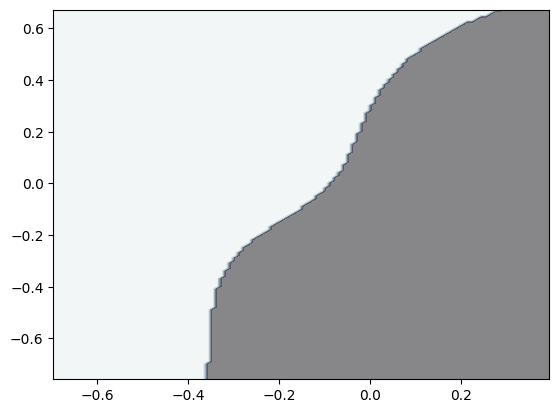

In [ ]:
#validación cruzada X_test, y_test para determinar los mejores parámetros  C  y  γ probar valores en pasos multiplicativos (p. ej., 0,01; 0,03; 0,1; 0,3; 1; 3; 10; 30). cargando data=np.loadtxt('dataset3_train.data',delimiter=',')

from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'C': [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30],
              'gamma': [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]}

# Create the SVM classifier
clf_rbf = svm.SVC(kernel='rbf')

# Create the GridSearchCV object
grid_search = GridSearchCV(clf_rbf, param_grid, cv=5) # 5-fold cross-validation

# Fit the GridSearchCV object to the data
grid_search.fit(X, y)

# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Evaluate the best model on the test set
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)
accuracy = (y_test == y_pred).sum() / y_test.size * 100
print(f"Accuracy on test set with best parameters: {accuracy:.2f}%")

# Plot the decision boundary for the best model
plot_hyperplane(best_clf, X)


94.3127962085308


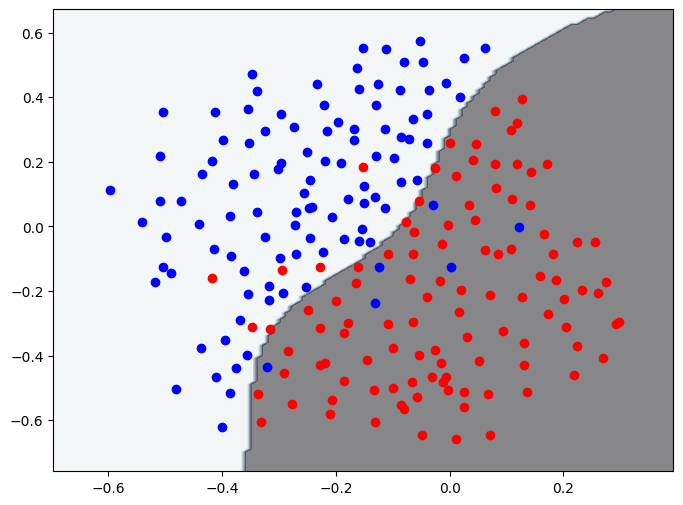

In [ ]:
########################################################################################
def plot_hyperplane(clf, X):
    # create a mesh to plot in
    h=0.01
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    CS=plt.contourf(xx, yy, Z,cmap=plt.cm.bone,alpha=0.5)
    #CS.cmap.set_under('yellow')
    #CS.cmap.set_over('cyan')


########################################################################################
#cargar dataset3: conjunto de entrenamiento y conjunto de prueba
data=np.loadtxt('dataset3_train.data',delimiter=',')
X=data[:,:2]
y=data[:,2].astype(int)
#data=np.loadtxt('dataset3_test.data',delimiter=',')
X_test=data[:,:2]
y_test=data[:,2].astype(int)

########################

##graficar datos de entrenamiento
plt.figure(figsize=(8, 6))

plt.plot(X[y==0,0],X[y==0,1],'or')
plt.plot(X[y==1,0],X[y==1,1],'ob')

########################################################################
C=30
gamma=3
## su codigo va aqui #########



#por ejemplo para un par de valores, C = 0.01 y gamma = 0.001 se tiene que el clasificador no funciona bien, accuracy es incluso por debajo
#de 50%
clf_rbf     = svm.SVC(kernel='rbf', gamma=gamma, C=C)
#entrenar
clf_rbf.fit(X, y)
y_pred = clf_rbf.predict(X_test)
por  = (y_test==y_pred).sum()/y_test.size*100
print(por)



#graficar frontera para el mejor par (C,gamma)
plot_hyperplane(clf_rbf,X)


plt.show()